## Importamos el respositorio del curso 

## Redes Neuronales recurrentes

In [ ]:
!git clone https://github.com/joanby/deeplearning-az.git

Cloning into 'deeplearning-az'...
remote: Enumerating objects: 10196, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 10196 (delta 50), reused 67 (delta 30), pack-reused 10096
Receiving objects: 100% (10196/10196), 281.16 MiB | 40.67 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Checking out files: 100% (10119/10119), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Red neuronal recurente
### Parte 1- Preprocesamiento de datos e importacion de librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importando del set de entrenamiento



In [ ]:
dataset_train = pd.read_csv('/content/deeplearning-az/datasets/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Train.csv')
# Valor de apertura en la bolsa
training_set = dataset_train.iloc[:, 1:2].values
# sintaxis para tomar solo una colunma con iloc

training_set, len(training_set)

(array([[325.25],
        [331.27],
        [329.83],
        ...,
        [793.7 ],
        [783.33],
        [782.75]]), 1258)

## Escalado de caracteristicas

In [ ]:
# la normalizacion es mas conveniente para la escala
from sklearn.preprocessing import MinMaxScaler
# se le pasa el minimo y el maximo
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

training_set,training_set_scaled

(array([[325.25],
        [331.27],
        [329.83],
        ...,
        [793.7 ],
        [783.33],
        [782.75]]), array([[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]]))

## Creacion de una estructura de datos con tiempo y 1 salido

In [ ]:
# numero de pasos es importante (time steps)
# en cada momento del tiempo la red neunal sera capaz de mirar 60 dias atras
# los 60 pasos del pasado sera la entrada de la red neuronal
# 60 pasos (trimestre) en base a los 3 meses anteriores que pasara en el dia actual
X_train = []

y_train = []

# el rango empieza en 60, porque la primera iteracion debera tomar desde el 60 hacia atras
# el limite sumerior es el ultimo indice de la observacion
for i in range(60, 1258):
# recordar que el numero a la derecha del : no se incluye
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
# reconvertimos todo a array de numpy
X_train, y_train = np.array(X_train), np.array(y_train)

X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

### Remodelacion

In [ ]:
# Agregando una dimension
# las redes neuronales recurrentes esperan un tensor tridimencional, batch_size(en este contexto, numero total de observaciones para entrenar), numero de pasos de tiempo, imput dim (numero de variables/indicadores)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1198, 60, 1)

### Parte 2 - Construyendo el RNN

Importacion de las librias y paquetes keras

In [ ]:
from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

## Inicializando el RNN

In [ ]:
# regresion lineal
regressor = Sequential()


In [ ]:
import tensorflow as tf

# regresion lineal
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.20))
# segunda capa
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(rate=0.20))

#  tercera capa
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(rate=0.2))


# cuarta capa

regressor.add(LSTM(50, return_sequences=False))
# desercion
regressor.add(Dropout(0.20))

# capa de salida, como se predice un unico valor se coloca una dimension

regressor.add(Dense(units=1))

# Compilacion del RNN

regressor.compile(loss="mean_squared_error",
                  optimizer=tf.keras.optimizers.Adam())


In [34]:
# fit

regressor.fit(x=X_train,
              y=y_train,
              epochs=100,
              batch_size=32)

Epoch 1/100
38/38 [==============================] - 1s 16ms/step - loss: 7.3863e-04
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 8.0764e-04
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 9.3870e-04
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 9.4868e-04
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 8.7614e-04
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 8.5602e-04
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 9.5816e-04
Epoch 9/100
38/38 [==============================] - 0s 12ms/step - loss: 8.6444e-04
Epoch 10/100
38/38 [==============================] - 0s 12ms/step - loss: 9.4414e-04
Epoch 11/100
38/38 [==============================] - 0s 12ms/step - loss: 8.0345e-04
Epoch 12/100
38/38 [==============================] - 0s 12ms/step 

##  Hacer las predicciones y visualizar los Obtencion del precio real de las acciones del 2017

In [36]:
dataset_test = pd.read_csv("/content/deeplearning-az/datasets/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Test.csv")

real_stock_price= dataset_test.iloc[:, 1:2].values

real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [46]:
# concatenacion de in y test(primer mes) axis = 0, por que tienen las mismas colunmnas
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)

# se escalan luego de la concatenacion

# limite inferior del dataset( ultimo dia del 2016) ubico el ultimo del a;o anterior y le resto 60
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values

print(inputs.shape)

# hay que cambiar de vector filas a vector columnas
# pasamos de vector filas a vector colunmnas
# la sintaxis de abajo significa, deja el primer valor talcual y a;ade otra dimension
inputs =inputs.reshape(-1,1)

inputs.shape

# debemos escalar los datos

# como ya me escalado ha sido ajustado no necesito volver a hacerlo
inputs = sc.transform(inputs)

X_test = []
# sumo 60 + los dias del test data osea 20
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
# para revertir el escalado
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


(80,)


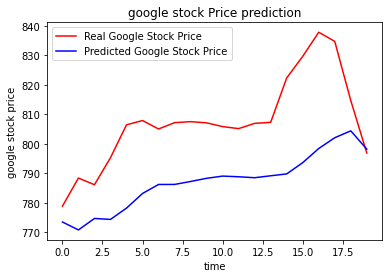

In [47]:
plt.plot(real_stock_price, color ="red", label= "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label="Predicted Google Stock Price")
plt.title("google stock Price prediction")
plt.xlabel("time")

plt.ylabel("google stock price")

plt.legend()
plt.show()